## Dataset Overview - Before Cleaning

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Paths
RAW_DIR = "../../dataset/raw"
OUT_DIR = "."
IMG_DIR = "images"

if not os.path.exists(IMG_DIR):
    os.makedirs(IMG_DIR)

print("Loading data...")
anime = pd.read_csv(os.path.join(RAW_DIR, "anime.csv"))
rating = pd.read_csv(os.path.join(RAW_DIR, "rating.csv"))

print("\n" + "="*80)
print("DATA LOADED SUCCESSFULLY")
print("="*80)

Loading data...


FileNotFoundError: [Errno 2] No such file or directory: '../dataset/raw\\anime.csv'

### Anime Dataset - Before Cleaning

In [2]:
print("\n" + "="*80)
print("ANIME DATASET - BEFORE CLEANING")
print("="*80)
print(f"\nDataset Shape: {anime.shape}")
print(f"Number of Rows: {anime.shape[0]:,}")
print(f"Number of Columns: {anime.shape[1]}")


ANIME DATASET - BEFORE CLEANING

Dataset Shape: (12294, 7)
Number of Rows: 12,294
Number of Columns: 7


In [3]:
print("\n--- First 5 Rows ---")
anime.head()


--- First 5 Rows ---


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
print("\n--- Dataset Info ---")
anime.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
print("\n--- Descriptive Statistics ---")
anime.describe()


--- Descriptive Statistics ---


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
print("\n--- Missing Values Summary ---")
missing_anime = pd.DataFrame({
    'Column': anime.columns,
    'Missing_Count': anime.isnull().sum().values,
    'Missing_Percentage': (anime.isnull().sum().values / len(anime) * 100).round(2)
})
missing_anime = missing_anime[missing_anime['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_anime.to_string(index=False))


--- Missing Values Summary ---
Column  Missing_Count  Missing_Percentage
rating            230                1.87
 genre             62                0.50
  type             25                0.20


### Rating Dataset - Before Cleaning

In [7]:
print("\n" + "="*80)
print("RATING DATASET - BEFORE CLEANING")
print("="*80)
print(f"\nDataset Shape: {rating.shape}")
print(f"Number of Rows: {rating.shape[0]:,}")
print(f"Number of Columns: {rating.shape[1]}")


RATING DATASET - BEFORE CLEANING

Dataset Shape: (7813737, 3)
Number of Rows: 7,813,737
Number of Columns: 3


In [8]:
print("\n--- First 5 Rows ---")
rating.head()


--- First 5 Rows ---


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [9]:
print("\n--- Dataset Info ---")
rating.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [10]:
print("\n--- Descriptive Statistics ---")
rating.describe()


--- Descriptive Statistics ---


,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [11]:
print("\n--- Missing Values Summary ---")
missing_rating = pd.DataFrame({
    'Column': rating.columns,
    'Missing_Count': rating.isnull().sum().values,
    'Missing_Percentage': (rating.isnull().sum().values / len(rating) * 100).round(2)
})
missing_rating = missing_rating[missing_rating['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
if len(missing_rating) > 0:
    print(missing_rating.to_string(index=False))
else:
    print("No missing values found!")


--- Missing Values Summary ---
No missing values found!


### Visualizations - Before Cleaning

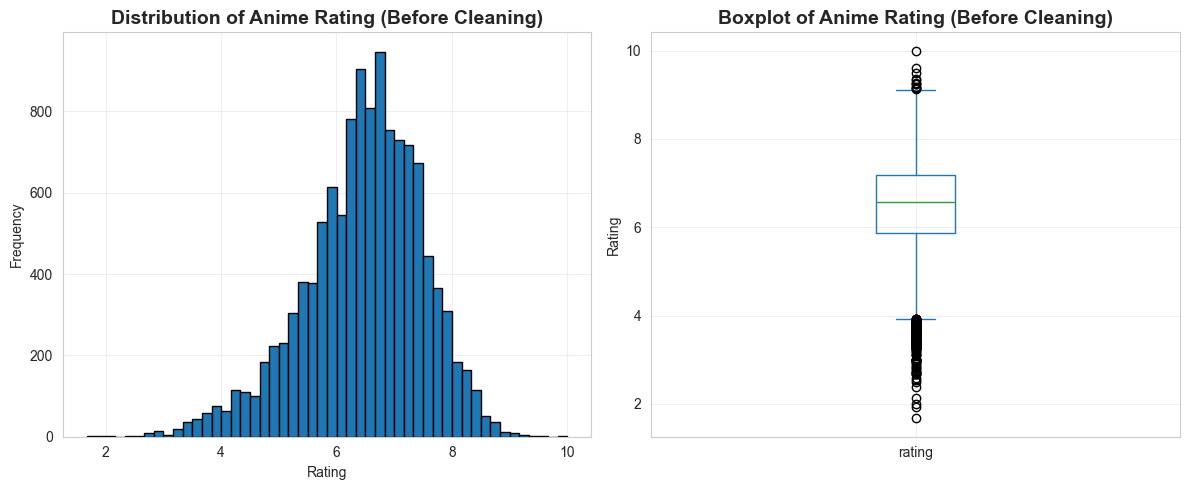

Saved: 01_anime_rating_before.png


In [12]:
# Distribution of Anime Rating (Before)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
anime['rating'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Anime Rating (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
anime['rating'].dropna().plot(kind='box')
plt.title('Boxplot of Anime Rating (Before Cleaning)', fontsize=14, fontweight='bold')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, '01_anime_rating_before.png'), dpi=300, bbox_inches='tight')
plt.show()
print("Saved: 01_anime_rating_before.png")

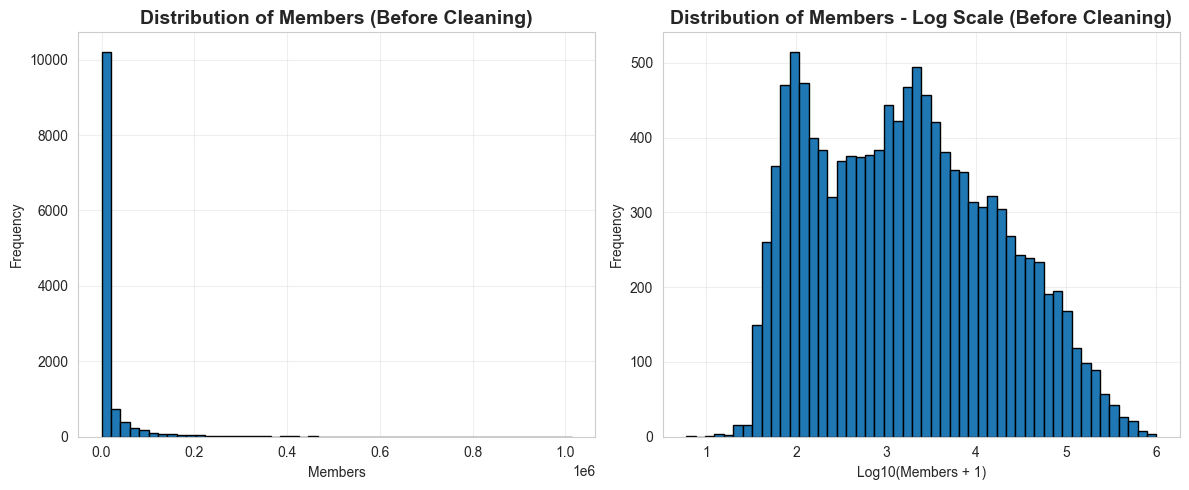

Saved: 02_members_before.png


In [13]:
# Distribution of Members (Before)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
anime['members'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Members (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Members')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Log scale for better visualization
anime['members'].apply(lambda x: np.log10(x+1)).hist(bins=50, edgecolor='black')
plt.title('Distribution of Members - Log Scale (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Log10(Members + 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, '02_members_before.png'), dpi=300, bbox_inches='tight')
plt.show()
print("Saved: 02_members_before.png")

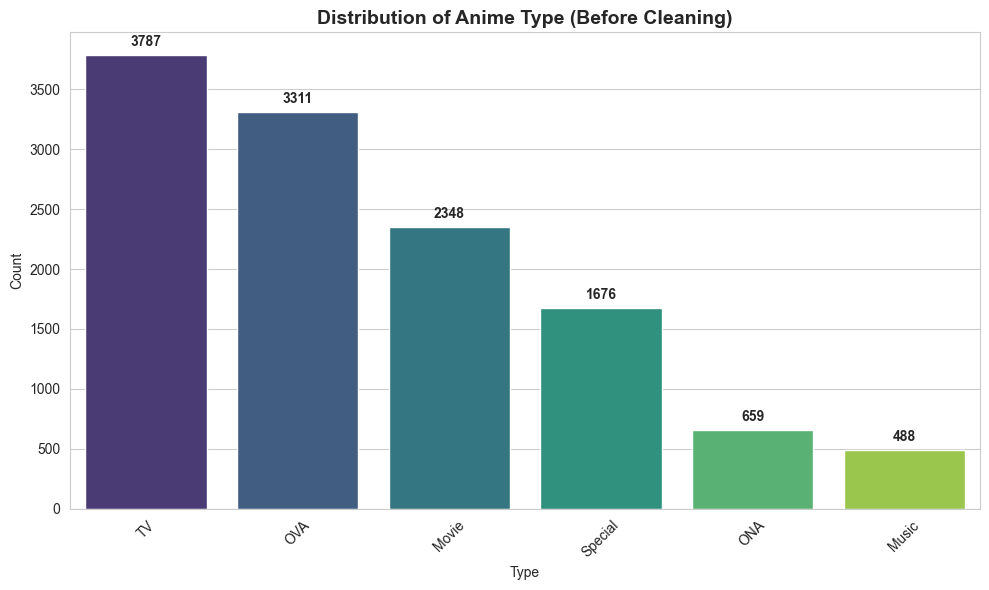

Saved: 03_type_before.png


In [14]:
# Distribution of Type (Before)
plt.figure(figsize=(10, 6))
type_counts = anime['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title('Distribution of Anime Type (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
for i, v in enumerate(type_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, '03_type_before.png'), dpi=300, bbox_inches='tight')
plt.show()
print("Saved: 03_type_before.png")

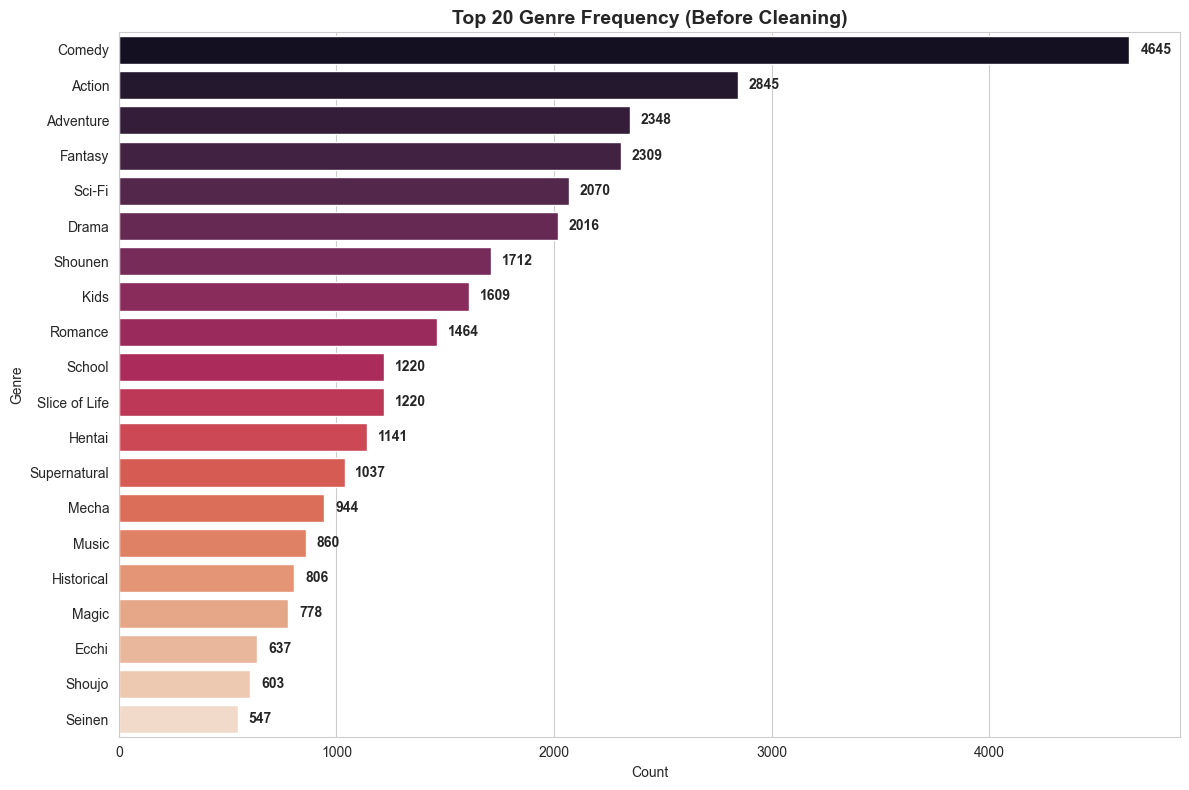

Saved: 04_genre_frequency_before.png


In [15]:
# Genre Frequency (Before) - Top 20 genres
# Extract all genres
all_genres = []
for genres_str in anime['genre'].dropna():
    genres_list = [g.strip() for g in str(genres_str).split(',')]
    all_genres.extend(genres_list)

genre_counts = pd.Series(all_genres).value_counts().head(20)

plt.figure(figsize=(12, 8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='rocket')
plt.title('Top 20 Genre Frequency (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Genre')
for i, v in enumerate(genre_counts.values):
    plt.text(v + 50, i, str(v), va='center', fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, '04_genre_frequency_before.png'), dpi=300, bbox_inches='tight')
plt.show()
print("Saved: 04_genre_frequency_before.png")

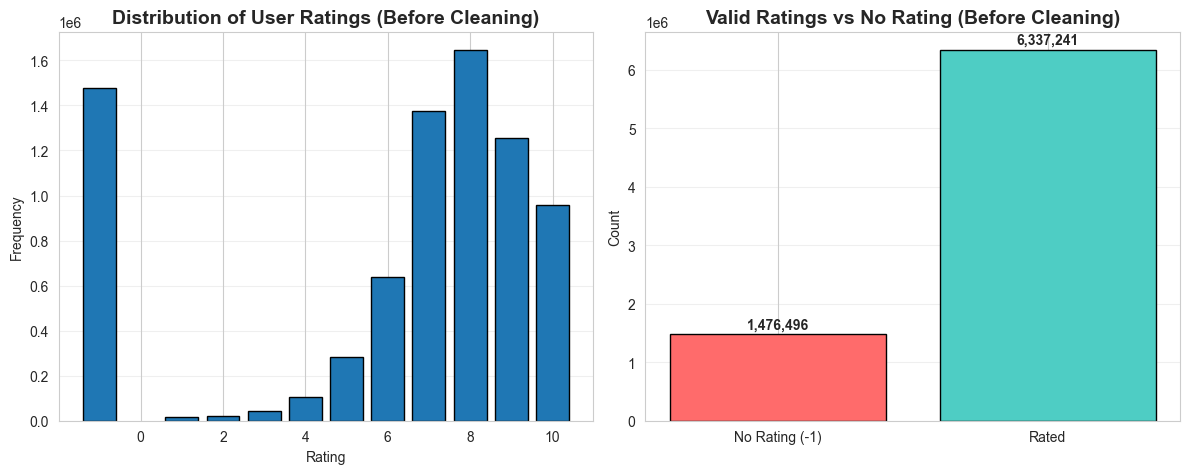

Saved: 05_user_rating_before.png


In [16]:
# User Rating Distribution (Before)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
rating_counts = rating['rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, edgecolor='black')
plt.title('Distribution of User Ratings (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
# Separate -1 and actual ratings
no_rating_count = (rating['rating'] == -1).sum()
rated_count = (rating['rating'] != -1).sum()
plt.bar(['No Rating (-1)', 'Rated'], [no_rating_count, rated_count], color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
plt.title('Valid Ratings vs No Rating (Before Cleaning)', fontsize=14, fontweight='bold')
plt.ylabel('Count')
for i, v in enumerate([no_rating_count, rated_count]):
    plt.text(i, v + 50000, f'{v:,}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, '05_user_rating_before.png'), dpi=300, bbox_inches='tight')
plt.show()
print("Saved: 05_user_rating_before.png")

## Data Cleaning Process

In [17]:
print("\n" + "="*80)
print("STARTING DATA CLEANING PROCESS")
print("="*80)


STARTING DATA CLEANING PROCESS


### Anime Cleaning

In [18]:
print("\nCleaning Anime Dataset...")

# 1. Genre: Take only the first genre (Loss of information)
# Fill NA first
anime['genre'] = anime['genre'].fillna('Unknown')
# Split and take first
anime['genre_encoded'] = anime['genre'].apply(lambda x: x.split(',')[0].strip())
print("  ✓ Genre: Extracted first genre only (simplified approach)")

# 2. Type: Fill NA
anime['type'] = anime['type'].fillna('Unknown')
print("  ✓ Type: Filled missing values with 'Unknown'")

# 3. Episodes: Handle Unknown -> Median, then Binning
# Replace Unknown with NaN
anime['episodes'] = anime['episodes'].replace('Unknown', np.nan)
# Convert to numeric
anime['episodes'] = anime['episodes'].astype(float)
# Fill NaN with median
anime['episodes'] = anime['episodes'].fillna(anime['episodes'].median())
print("  ✓ Episodes: Replaced 'Unknown' with median value")

# Binning Logic for Episodes (Target Class in User's Example)
def bin_episodes(row):
    # If it's a movie/special type, categorize as such
    if row['type'] in ['Movie', 'Special', 'OVA', 'ONA', 'Music']:
        return 'Movie/Special'
    
    x = row['episodes']
    if x <= 13:
        return 'Short_Series'
    elif x <= 26:
        return 'Medium_Series'
    elif x <= 100:
        return 'Long_Series'
    else:
        return 'Very_Long_Series'

anime['episodes_encoded'] = anime.apply(bin_episodes, axis=1)
print("  ✓ Episodes: Applied rule-based binning")

# 4. Anime Rating: Simple Binning
# Fill NaN
anime['rating'] = anime['rating'].fillna(anime['rating'].median())

def bin_anime_rating(x):
    if x < 6.0:
        return 'Low'
    elif x < 8.0:
        return 'Average'
    else:
        return 'High'

anime['anime_rating_encoded'] = anime['rating'].apply(bin_anime_rating)
print("  ✓ Anime Rating: Applied 3-bin categorization (Low/Average/High)")

# 5. Members: Simple Binning
def bin_members(x):
    if x < 10000:
        return 'Low'
    elif x < 100000:
        return 'Medium'
    else:
        return 'High'

anime['members_encoded'] = anime['members'].apply(bin_members)
print("  ✓ Members: Applied 3-bin categorization (Low/Medium/High)")

# Select columns for anime-cleaned.csv
anime_out = anime[['anime_id', 'name', 'genre_encoded', 'type', 'episodes_encoded', 'anime_rating_encoded', 'members_encoded']]
anime_out.to_csv("anime-cleaned.csv", index=False)
print("\n✓ Saved anime-cleaned.csv")


Cleaning Anime Dataset...
  ✓ Genre: Extracted first genre only (simplified approach)
  ✓ Type: Filled missing values with 'Unknown'
  ✓ Episodes: Replaced 'Unknown' with median value
  ✓ Episodes: Applied rule-based binning
  ✓ Anime Rating: Applied 3-bin categorization (Low/Average/High)
  ✓ Members: Applied 3-bin categorization (Low/Medium/High)

✓ Saved anime-cleaned.csv


### Rating Cleaning 

In [19]:
print("\nCleaning Rating Dataset...")

# 1. User Rating: Handle -1 and Bin
# -1 in dataset often means "watched but not rated". We will treat it as a category "No_Rating".
def bin_user_rating(x):
    if x == -1:
        return 'No_Rating'
    elif x < 6:
        return 'Low'
    elif x < 8:
        return 'Average'
    else:
        return 'High'

rating['user_rating_encoded'] = rating['rating'].apply(bin_user_rating)
print("  ✓ User Rating: Applied 4-category encoding (No_Rating/Low/Average/High)")

# Select columns for rating-cleaned.csv
rating_out = rating[['user_id', 'anime_id', 'user_rating_encoded']]
rating_out.to_csv("rating-cleaned.csv", index=False)
print("\n✓ Saved rating-cleaned.csv")


Cleaning Rating Dataset...
  ✓ User Rating: Applied 4-category encoding (No_Rating/Low/Average/High)

✓ Saved rating-cleaned.csv


### Merging Datasets

In [20]:
print("\nMerging Datasets...")
combined = pd.merge(rating_out, anime_out, on='anime_id', how='left')
print(f"  ✓ Merged shape: {combined.shape}")

# Drop rows where anime info might be missing (if any)
before_drop = len(combined)
combined = combined.dropna()
after_drop = len(combined)
print(f"  ✓ Dropped {before_drop - after_drop:,} rows with missing anime info")

combined.to_csv("combined.csv", index=False)
print("\n✓ Saved combined.csv")


Merging Datasets...
  ✓ Merged shape: (7813737, 9)
  ✓ Dropped 10 rows with missing anime info

✓ Saved combined.csv


## Dataset Overview - After Cleaning

### Anime Dataset - After Cleaning

In [21]:
print("\n" + "="*80)
print("ANIME DATASET - AFTER CLEANING")
print("="*80)
print(f"\nDataset Shape: {anime_out.shape}")
print(f"Number of Rows: {anime_out.shape[0]:,}")
print(f"Number of Columns: {anime_out.shape[1]}")


ANIME DATASET - AFTER CLEANING

Dataset Shape: (12294, 7)
Number of Rows: 12,294
Number of Columns: 7


In [22]:
print("\n--- First 5 Rows ---")
anime_out.head()


--- First 5 Rows ---


,anime_id,name,genre_encoded,type,episodes_encoded,anime_rating_encoded,members_encoded
0,32281,Kimi no Na wa.,Drama,Movie,Movie/Special,High,High
1,5114,Fullmetal Alchemist: Brotherhood,Action,TV,Long_Series,High,High
2,28977,Gintama°,Action,TV,Long_Series,High,High
3,9253,Steins;Gate,Sci-Fi,TV,Medium_Series,High,High
4,9969,Gintama&#039;,Action,TV,Long_Series,High,High


In [23]:
print("\n--- Dataset Info ---")
anime_out.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   anime_id              12294 non-null  int64 
 1   name                  12294 non-null  object
 2   genre_encoded         12294 non-null  object
 3   type                  12294 non-null  object
 4   episodes_encoded      12294 non-null  object
 5   anime_rating_encoded  12294 non-null  object
 6   members_encoded       12294 non-null  object
dtypes: int64(1), object(6)
memory usage: 672.5+ KB


In [24]:
print("\n--- Descriptive Statistics ---")
anime_out.describe()


--- Descriptive Statistics ---


,anime_id
count,12294.000000
mean,14058.221653
std,11455.294701
min,1.000000
25%,3484.250000
50%,10260.500000
75%,24794.500000
max,34527.000000


In [25]:
print("\n--- Missing Values Summary ---")
missing_anime_after = pd.DataFrame({
    'Column': anime_out.columns,
    'Missing_Count': anime_out.isnull().sum().values,
    'Missing_Percentage': (anime_out.isnull().sum().values / len(anime_out) * 100).round(2)
})
missing_anime_after = missing_anime_after[missing_anime_after['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
if len(missing_anime_after) > 0:
    print(missing_anime_after.to_string(index=False))
else:
    print("No missing values found!")


--- Missing Values Summary ---
No missing values found!


### Rating Dataset - After Cleaning

In [26]:
print("\n" + "="*80)
print("RATING DATASET - AFTER CLEANING")
print("="*80)
print(f"\nDataset Shape: {rating_out.shape}")
print(f"Number of Rows: {rating_out.shape[0]:,}")
print(f"Number of Columns: {rating_out.shape[1]}")


RATING DATASET - AFTER CLEANING

Dataset Shape: (7813737, 3)
Number of Rows: 7,813,737
Number of Columns: 3


In [27]:
print("\n--- First 5 Rows ---")
rating_out.head()


--- First 5 Rows ---


,user_id,anime_id,user_rating_encoded
0,1,20,No_Rating
1,1,24,No_Rating
2,1,79,No_Rating
3,1,226,No_Rating
4,1,241,No_Rating


In [28]:
print("\n--- Dataset Info ---")
rating_out.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   user_id              int64 
 1   anime_id             int64 
 2   user_rating_encoded  object
dtypes: int64(2), object(1)
memory usage: 178.8+ MB


In [29]:
print("\n--- Descriptive Statistics ---")
rating_out.describe()


--- Descriptive Statistics ---


,user_id,anime_id
count,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03
std,2.099795e+04,8.883950e+03
min,1.000000e+00,1.000000e+00
25%,1.897400e+04,1.240000e+03
50%,3.679100e+04,6.213000e+03
75%,5.475700e+04,1.409300e+04
max,7.351600e+04,3.451900e+04


In [30]:
print("\n--- Missing Values Summary ---")
missing_rating_after = pd.DataFrame({
    'Column': rating_out.columns,
    'Missing_Count': rating_out.isnull().sum().values,
    'Missing_Percentage': (rating_out.isnull().sum().values / len(rating_out) * 100).round(2)
})
missing_rating_after = missing_rating_after[missing_rating_after['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
if len(missing_rating_after) > 0:
    print(missing_rating_after.to_string(index=False))
else:
    print("No missing values found!")


--- Missing Values Summary ---
No missing values found!


### Combined Dataset - After Cleaning

In [31]:
print("\n" + "="*80)
print("COMBINED DATASET - AFTER CLEANING")
print("="*80)
print(f"\nDataset Shape: {combined.shape}")
print(f"Number of Rows: {combined.shape[0]:,}")
print(f"Number of Columns: {combined.shape[1]}")


COMBINED DATASET - AFTER CLEANING

Dataset Shape: (7813727, 9)
Number of Rows: 7,813,727
Number of Columns: 9


In [32]:
print("\n--- First 5 Rows ---")
combined.head()


--- First 5 Rows ---


,user_id,anime_id,user_rating_encoded,name,genre_encoded,type,episodes_encoded,anime_rating_encoded,members_encoded
0,1,20,No_Rating,Naruto,Action,TV,Very_Long_Series,Average,High
1,1,24,No_Rating,School Rumble,Comedy,TV,Medium_Series,High,High
2,1,79,No_Rating,Shuffle!,Comedy,TV,Medium_Series,Average,High
3,1,226,No_Rating,Elfen Lied,Action,TV,Short_Series,Average,High
4,1,241,No_Rating,Girls Bravo: First Season,Comedy,TV,Short_Series,Average,Medium


In [33]:
print("\n--- Dataset Info ---")
combined.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 7813727 entries, 0 to 7813736
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   user_id               int64 
 1   anime_id              int64 
 2   user_rating_encoded   object
 3   name                  object
 4   genre_encoded         object
 5   type                  object
 6   episodes_encoded      object
 7   anime_rating_encoded  object
 8   members_encoded       object
dtypes: int64(2), object(7)
memory usage: 596.1+ MB


In [34]:
print("\n--- Descriptive Statistics ---")
combined.describe()


--- Descriptive Statistics ---


,user_id,anime_id
count,7.813727e+06,7.813727e+06
mean,3.672795e+04,8.909045e+03
std,2.099795e+04,8.883923e+03
min,1.000000e+00,1.000000e+00
25%,1.897400e+04,1.240000e+03
50%,3.679100e+04,6.213000e+03
75%,5.475700e+04,1.409300e+04
max,7.351600e+04,3.451900e+04


In [35]:
print("\n--- Missing Values Summary ---")
missing_combined = pd.DataFrame({
    'Column': combined.columns,
    'Missing_Count': combined.isnull().sum().values,
    'Missing_Percentage': (combined.isnull().sum().values / len(combined) * 100).round(2)
})
missing_combined = missing_combined[missing_combined['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
if len(missing_combined) > 0:
    print(missing_combined.to_string(index=False))
else:
    print("No missing values found!")


--- Missing Values Summary ---
No missing values found!


### Visualizations - After Cleaning

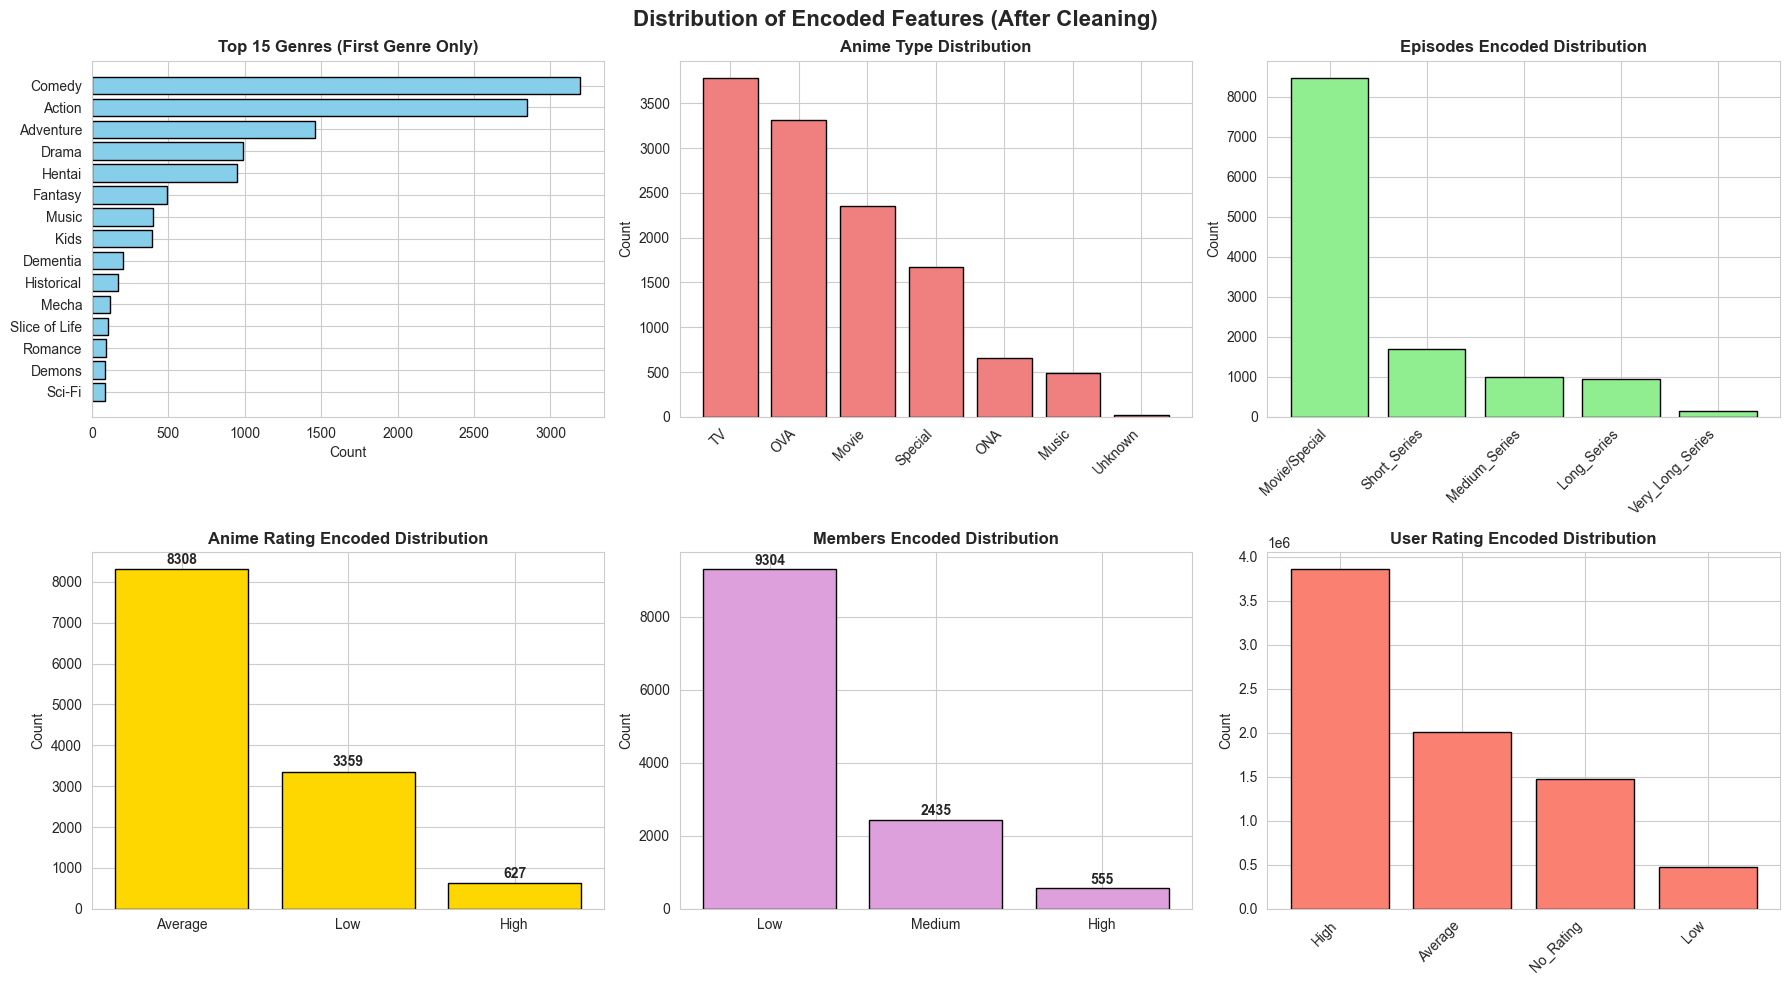

Saved: 06_encoded_features_after.png


In [36]:
# Distribution of Encoded Features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Encoded Features (After Cleaning)', fontsize=16, fontweight='bold')

# Genre Encoded
genre_counts = anime_out['genre_encoded'].value_counts().head(15)
axes[0, 0].barh(range(len(genre_counts)), genre_counts.values, color='skyblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(genre_counts)))
axes[0, 0].set_yticklabels(genre_counts.index)
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_title('Top 15 Genres (First Genre Only)', fontweight='bold')
axes[0, 0].invert_yaxis()

# Type
type_counts = anime_out['type'].value_counts()
axes[0, 1].bar(range(len(type_counts)), type_counts.values, color='lightcoral', edgecolor='black')
axes[0, 1].set_xticks(range(len(type_counts)))
axes[0, 1].set_xticklabels(type_counts.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Anime Type Distribution', fontweight='bold')

# Episodes Encoded
episodes_counts = anime_out['episodes_encoded'].value_counts()
axes[0, 2].bar(range(len(episodes_counts)), episodes_counts.values, color='lightgreen', edgecolor='black')
axes[0, 2].set_xticks(range(len(episodes_counts)))
axes[0, 2].set_xticklabels(episodes_counts.index, rotation=45, ha='right')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Episodes Encoded Distribution', fontweight='bold')

# Anime Rating Encoded
anime_rating_counts = anime_out['anime_rating_encoded'].value_counts()
axes[1, 0].bar(anime_rating_counts.index, anime_rating_counts.values, color='gold', edgecolor='black')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Anime Rating Encoded Distribution', fontweight='bold')
for i, v in enumerate(anime_rating_counts.values):
    axes[1, 0].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Members Encoded
members_counts = anime_out['members_encoded'].value_counts()
axes[1, 1].bar(members_counts.index, members_counts.values, color='plum', edgecolor='black')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Members Encoded Distribution', fontweight='bold')
for i, v in enumerate(members_counts.values):
    axes[1, 1].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# User Rating Encoded
user_rating_counts = rating_out['user_rating_encoded'].value_counts()
axes[1, 2].bar(range(len(user_rating_counts)), user_rating_counts.values, color='salmon', edgecolor='black')
axes[1, 2].set_xticks(range(len(user_rating_counts)))
axes[1, 2].set_xticklabels(user_rating_counts.index, rotation=45, ha='right')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('User Rating Encoded Distribution', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, '06_encoded_features_after.png'), dpi=300, bbox_inches='tight')
plt.show()
print("Saved: 06_encoded_features_after.png")

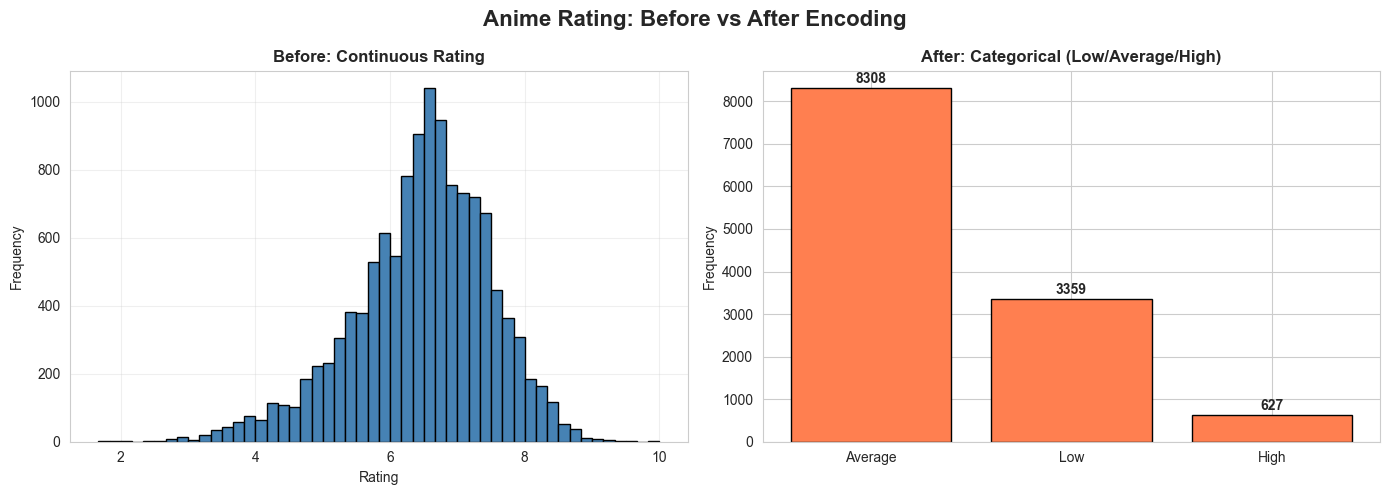

Saved: 07_comparison_anime_rating.png


In [37]:
# Comparison: Before vs After - Anime Rating
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Anime Rating: Before vs After Encoding', fontsize=16, fontweight='bold')

# Before
anime['rating'].hist(bins=50, ax=axes[0], edgecolor='black', color='steelblue')
axes[0].set_title('Before: Continuous Rating', fontweight='bold')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# After
anime_rating_counts = anime_out['anime_rating_encoded'].value_counts()
axes[1].bar(anime_rating_counts.index, anime_rating_counts.values, color='coral', edgecolor='black')
axes[1].set_title('After: Categorical (Low/Average/High)', fontweight='bold')
axes[1].set_ylabel('Frequency')
for i, v in enumerate(anime_rating_counts.values):
    axes[1].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, '07_comparison_anime_rating.png'), dpi=300, bbox_inches='tight')
plt.show()
print("Saved: 07_comparison_anime_rating.png")

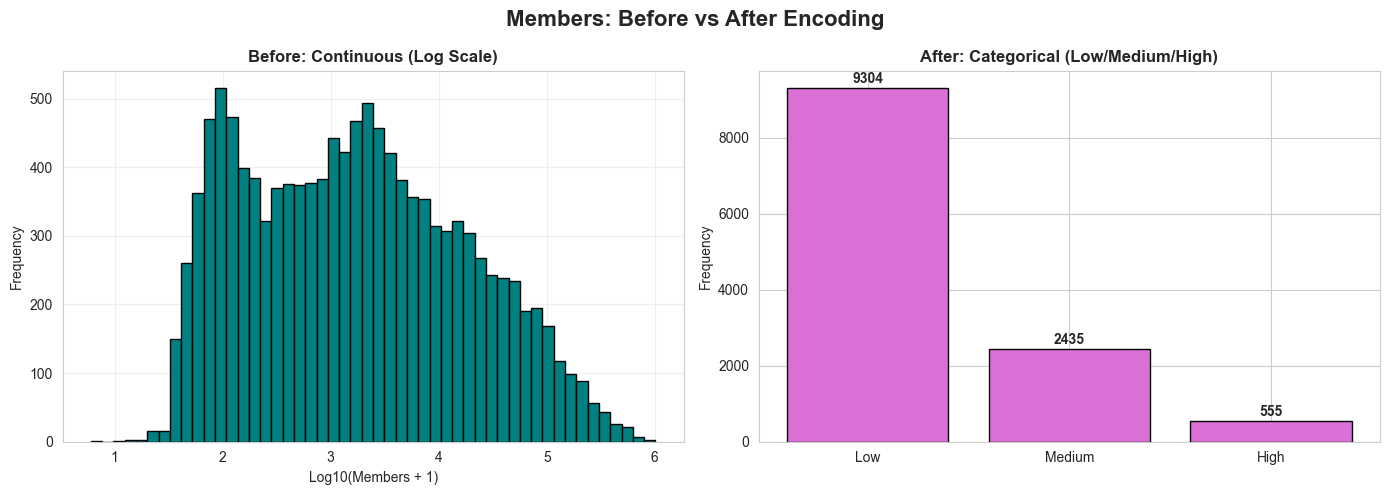

Saved: 08_comparison_members.png


In [38]:
# Comparison: Before vs After - Members
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Members: Before vs After Encoding', fontsize=16, fontweight='bold')

# Before (log scale)
anime['members'].apply(lambda x: np.log10(x+1)).hist(bins=50, ax=axes[0], edgecolor='black', color='teal')
axes[0].set_title('Before: Continuous (Log Scale)', fontweight='bold')
axes[0].set_xlabel('Log10(Members + 1)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# After
members_counts = anime_out['members_encoded'].value_counts()
axes[1].bar(members_counts.index, members_counts.values, color='orchid', edgecolor='black')
axes[1].set_title('After: Categorical (Low/Medium/High)', fontweight='bold')
axes[1].set_ylabel('Frequency')
for i, v in enumerate(members_counts.values):
    axes[1].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(IMG_DIR, '08_comparison_members.png'), dpi=300, bbox_inches='tight')
plt.show()
print("Saved: 08_comparison_members.png")

## Association Rule Mining

In [39]:
print("\n" + "="*80)
print("ASSOCIATION RULE MINING")
print("="*80)

# Install mlxtend if not available
try:
    from mlxtend.frequent_patterns import apriori, association_rules
    print("✓ mlxtend library loaded successfully")
except ImportError:
    print("Installing mlxtend library...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mlxtend"])
    from mlxtend.frequent_patterns import apriori, association_rules
    print("✓ mlxtend library installed and loaded")


ASSOCIATION RULE MINING
✓ mlxtend library loaded successfully


In [40]:
# Prepare data for association rules
# Sample the combined dataset for computational efficiency
print("\nPreparing data for association rule mining...")
combined_sample = combined.sample(n=min(10000, len(combined)), random_state=42)
print(f"Sample size: {len(combined_sample):,} records")

# Select categorical columns (exclude IDs and names)
categorical_cols = ['genre_encoded', 'type', 'episodes_encoded', 'anime_rating_encoded', 'members_encoded', 'user_rating_encoded']

# One-hot encode for association rules
basket = pd.get_dummies(combined_sample[categorical_cols], prefix_sep='=')
print(f"One-hot encoded shape: {basket.shape}")
print(f"Number of unique items: {basket.shape[1]}")


Preparing data for association rule mining...
Sample size: 10,000 records
One-hot encoded shape: (10000, 55)
Number of unique items: 55


In [41]:
# Apply Apriori algorithm
print("\nRunning Apriori algorithm...")
# Use a low min_support to find meaningful patterns
min_support = 0.01  # 1% support threshold
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
print(f"Found {len(frequent_itemsets)} frequent itemsets with min_support={min_support}")


Running Apriori algorithm...
Found 1068 frequent itemsets with min_support=0.01


In [42]:
# Generate association rules
print("\nGenerating association rules...")
min_confidence = 0.3  # 30% confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=len(frequent_itemsets))
print(f"Found {len(rules)} association rules with min_confidence={min_confidence}")


Generating association rules...
Found 4390 association rules with min_confidence=0.3


In [43]:
# Extract top 10 rules by lift
print("\n" + "="*80)
print("TOP 10 ASSOCIATION RULES (Sorted by Lift)")
print("="*80)

if len(rules) > 0:
    # Sort by lift and get top 10
    top_rules = rules.nlargest(10, 'lift')[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
    
    # Format for better display
    top_rules['antecedents'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
    top_rules['consequents'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))
    top_rules['support'] = top_rules['support'].round(4)
    top_rules['confidence'] = top_rules['confidence'].round(4)
    top_rules['lift'] = top_rules['lift'].round(4)
    
    # Reset index for better display
    top_rules = top_rules.reset_index(drop=True)
    top_rules.index = top_rules.index + 1
    
    print("\n")
    print(top_rules.to_string())
    
    # Save to global variable for explanation file
    top_rules_global = top_rules.copy()
else:
    print("\nNo association rules found with the current thresholds.")
    print("Try lowering min_support or min_confidence.")
    top_rules_global = None


TOP 10 ASSOCIATION RULES (Sorted by Lift)


                                                                           antecedents                                                                     consequents  support  confidence     lift
1        episodes_encoded=Movie/Special, members_encoded=High, genre_encoded=Adventure                                           anime_rating_encoded=High, type=Movie   0.0126      0.8344  15.0079
2   episodes_encoded=Movie/Special, anime_rating_encoded=High, genre_encoded=Adventure                                                members_encoded=High, type=Movie   0.0126      0.7368  13.8244
3                       anime_rating_encoded=High, type=Movie, genre_encoded=Adventure                            episodes_encoded=Movie/Special, members_encoded=High   0.0126      0.8344  11.2610
4                            members_encoded=High, type=Movie, genre_encoded=Adventure                       episodes_encoded=Movie/Special, anime_rating_encoded=High 

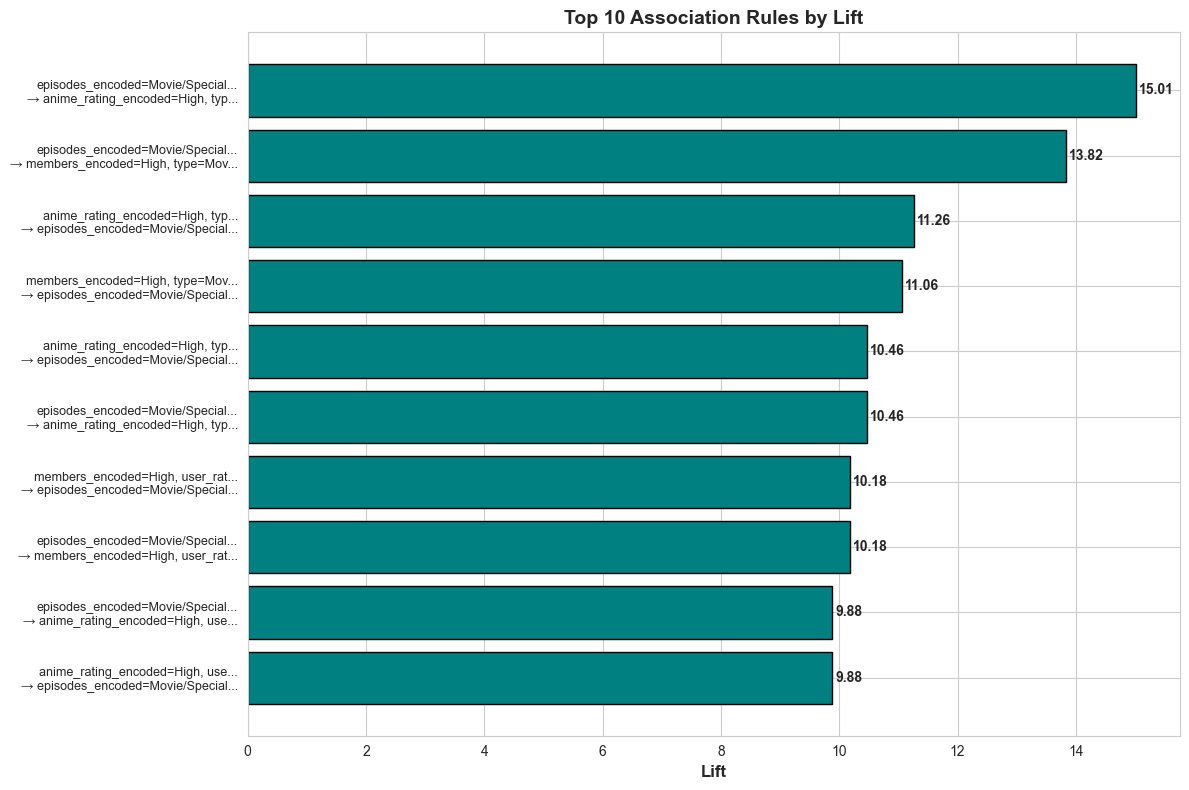


Saved: 09_association_rules_lift.png


In [44]:
# Visualize top rules
if len(rules) > 0:
    plt.figure(figsize=(12, 8))
    top_10_for_viz = rules.nlargest(10, 'lift')
    
    # Create rule labels
    rule_labels = []
    for idx, row in top_10_for_viz.iterrows():
        ant = ', '.join(list(row['antecedents']))[:30] + '...' if len(', '.join(list(row['antecedents']))) > 30 else ', '.join(list(row['antecedents']))
        cons = ', '.join(list(row['consequents']))[:30] + '...' if len(', '.join(list(row['consequents']))) > 30 else ', '.join(list(row['consequents']))
        rule_labels.append(f"{ant}\n→ {cons}")
    
    # Plot
    bars = plt.barh(range(len(top_10_for_viz)), top_10_for_viz['lift'].values, color='teal', edgecolor='black')
    plt.yticks(range(len(top_10_for_viz)), rule_labels, fontsize=9)
    plt.xlabel('Lift', fontsize=12, fontweight='bold')
    plt.title('Top 10 Association Rules by Lift', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, top_10_for_viz['lift'].values)):
        plt.text(val + 0.05, i, f'{val:.2f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig(os.path.join(IMG_DIR, '09_association_rules_lift.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("\nSaved: 09_association_rules_lift.png")
else:
    print("\nSkipping visualization (no rules found)")

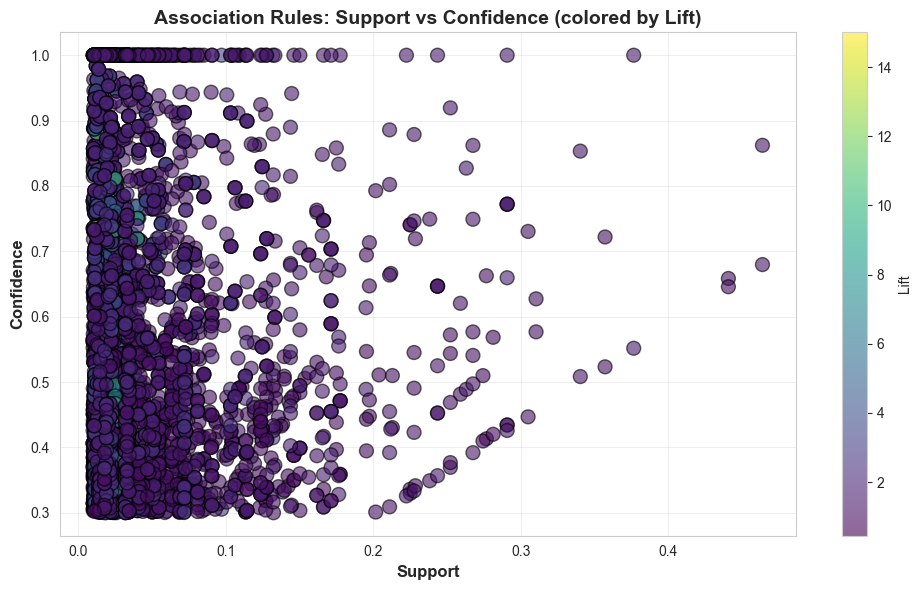

Saved: 10_association_rules_scatter.png


In [45]:
# Additional visualization: Support vs Confidence scatter plot
if len(rules) > 0:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], 
                         cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    plt.colorbar(scatter, label='Lift')
    plt.xlabel('Support', fontsize=12, fontweight='bold')
    plt.ylabel('Confidence', fontsize=12, fontweight='bold')
    plt.title('Association Rules: Support vs Confidence (colored by Lift)', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(IMG_DIR, '10_association_rules_scatter.png'), dpi=300, bbox_inches='tight')
    plt.show()
    print("Saved: 10_association_rules_scatter.png")
else:
    print("Skipping scatter plot (no rules found)")

## Export Results

In [46]:
print("\n" + "="*80)
print("GENERATING ARFF FILES")
print("="*80)


GENERATING ARFF FILES


In [47]:
def to_arff(df, filename, relation_name):
    """
    Convert DataFrame to ARFF format for Weka
    """
    # Filter out columns that are not useful for Weka (IDs, Names)
    cols_to_write = [c for c in df.columns if c not in ['anime_id', 'user_id', 'name']]
    
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(f"@RELATION {relation_name}\n\n")
        
        for col in cols_to_write:
            # Check dtype
            if df[col].dtype == 'object' or df[col].dtype.name == 'category':
                # Nominal
                unique_vals = df[col].unique()
                # Clean values for ARFF (remove quotes, handle spaces)
                clean_vals = []
                for v in unique_vals:
                    s = str(v)
                    # Escape single quotes
                    s = s.replace("'", "\\'")
                    # Quote if contains space or special chars
                    if ' ' in s or ',' in s or '{' in s or '}' in s or '?' in s:
                        s = f"'{s}'"
                    clean_vals.append(s)
                
                # Join
                vals_str = ",".join(clean_vals)
                f.write(f"@ATTRIBUTE {col} {{{vals_str}}}\n")
            else:
                # Numeric
                f.write(f"@ATTRIBUTE {col} NUMERIC\n")
        
        f.write("\n@DATA\n")
        
        # Write data
        for i, row in df[cols_to_write].iterrows():
            line_vals = []
            for col in cols_to_write:
                val = row[col]
                s = str(val)
                s = s.replace("'", "\\'")
                if ' ' in s or ',' in s or '{' in s or '}' in s or '?' in s:
                    s = f"'{s}'"
                line_vals.append(s)
            f.write(",".join(line_vals) + "\n")
    
    print(f"✓ Generated {filename}")

In [49]:
# 1. anime-cleaned.arff
to_arff(anime_out, "anime-cleaned.arff", "anime_data")

# 2. rating-cleaned.arff
# Sampling rating because it's huge (7M rows)
rating_sampled = rating_out.sample(n=100000, random_state=42)
to_arff(rating_sampled, "rating-cleaned.arff", "rating_data")

# 3. combined-cleaned.arff
# User requested sample around 100k
combined_sampled = combined.sample(n=10000, random_state=42)
to_arff(combined_sampled, "combined-cleaned.arff", "combined_data")

print("\n" + "="*80)
print("ALL PROCESSING COMPLETE!")
print("="*80)

✓ Generated anime-cleaned.arff
✓ Generated rating-cleaned.arff
✓ Generated combined-cleaned.arff

ALL PROCESSING COMPLETE!
